# LINEAR REGRESSION

---
# **Table of Contents**
---

1. [**Problem Statement**](#Section1)<br>
2. [**Installing & Importing Libraries**](#Section2)<br>
3. [**Data Acquisition & Description**](#Section3)<br>
4. [**Data Pre-Profiling**](#Section4)<br>
5. [**Data Pre-Processing**](#Section5)<br>
6. [**Data Post-Profiling**](#Section6)<br>
7. [**Exploratory Data Analysis**](#Section7)<br>
8. [**Linear Regression Model**](#Section8)<br>
    - 8.1 [Preparing X and y using pandas](#Section801)<br>
    - 8.2 [Splitting X and y into training and test datasets](#Section802)<br>
    - 8.3 [Model Evaluation](#Section803)<br>    
    
    
    

---
<a name = Section1></a>
# **1. Problem Statement**
---

There is an automobile company XYZ from Japan which aspires to enter the Indian market by setting up their manufacturing unit there and producing cars locally to give competition to their Indian and European counterparts.
They want to understand the factors affecting the pricing of cars in the Indian market, since those may be very different from the Japanese market. 
Essentially, the company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Indian market.


**Business Objectives:**

You as a Data scientist are required to apply some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.

---
<a id = Section2></a>
# **2. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np
#-------------------------------------------------------------------------------------------------------------------------------
# allow plots to appear directly in the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = 12, 7
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import RFE
import statsmodels.api as sm

---
<a name = Section3></a>
# **3. Data Acquisition & Description**
---
The cars dataset captures price of cars with respect to below Independent variables

|Id|Feature|Description|
|:--|:--|:--|
|01| name             |  Name of the car |
|02| company       |  Company which manufactured the car |
|03| year              |  Year of manufacturing |
|04| kms_driven   |  No.of kilometers driven |
|05| fuel_type      |  Fuel type |

In [56]:
data = pd.read_csv('https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv')

In [57]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [59]:
data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


---
<a name = Section4></a>
# **4. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [60]:
profile = data.profile_report(title="Car's Data Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="cars_data_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 6
- Number of observations: 892
- Missing cells: 107 (2%)


__Variables types__: 
- Numeric = 0
- Categorical = 6

<br>

- **Year column has many non year values**
- **kms_driven has kms at the end of each observation**
- **fuel_type and kms_driven are having missing values**


---
<a name = Section5></a>
# **5. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [61]:
data.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

- Year column has many non year values 
- Convert year and price to numerical data types
- kms_driven has kms with integers
- fuel_type and kms_driven are having missing values
- keep first 3 words of name

In [62]:
data_copy = data.copy()  # Make copy of existing dataset

In [63]:
print(data is data_copy)

False


### Working on Year column

- __Year column is having some string data and we are removing these observations to proceed with our model__
- __Converting year column into integer from object type__

In [64]:
data = data[data.year.str.isnumeric()]

In [65]:
data.year = data.year.astype(int)

In [66]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


### Working on price column
- __Removing Ask For Price from the observations in Price column__
- __Removing comas from the price column__

In [68]:
data = data[data.Price != 'Ask For Price']

In [69]:
data.Price = data.Price.str.replace(',' ,  '').astype(int)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


### Working on kms_driven column
- __Removing kms and comma from the observations and converting it into integer__
- __Removing the observations with Petrol in kms driven column__
- __Converting kms_driven to integer type__

In [71]:
data.kms_driven = data.kms_driven.str.split(' ').str.get(0).str.replace(',' , '')

In [72]:
data = data[data.kms_driven.str.isnumeric()]

In [73]:
data.kms_driven

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: object

In [74]:
data.kms_driven = data.kms_driven.astype('int')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


### Working on fuel_type column
- __Removing missing values__

In [76]:
data = data[~data.fuel_type.isna()]

In [77]:
data[data.fuel_type.isna()]

,name,company,year,Price,kms_driven,fuel_type


In [78]:
data.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

### Working on name column 
- __Considering first 3 words in the name column__

In [79]:
data.name = data.name.str.split(' ').str.slice(0,3).str.join(' ')

In [80]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [81]:
# The above operationn will have impact on change in index. So we are reseting the index to get on track
data = data.reset_index(drop=True)

In [82]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [84]:
data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [85]:
data[(data.Price > 6e06)]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [86]:
data = data[(data.Price < 6e06)].reset_index(drop=True)

In [87]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


---
<a name = Section6></a>
# **6. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [88]:
profile = data.profile_report(title="Car's Data Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="cars_data_after_preprocessing.html")

---
<a name = Section7></a>
# **7. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

In [89]:
plt.rcParams['figure.figsize'] = 12, 7
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

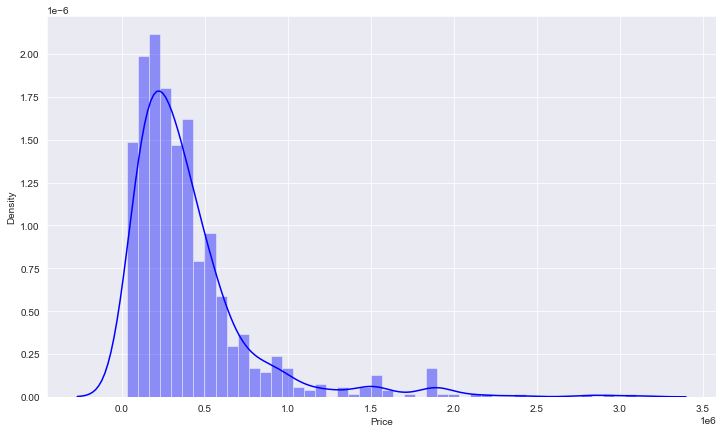

In [90]:
# Is my data normally distributed?
sns.distplot(data.Price, color='b');

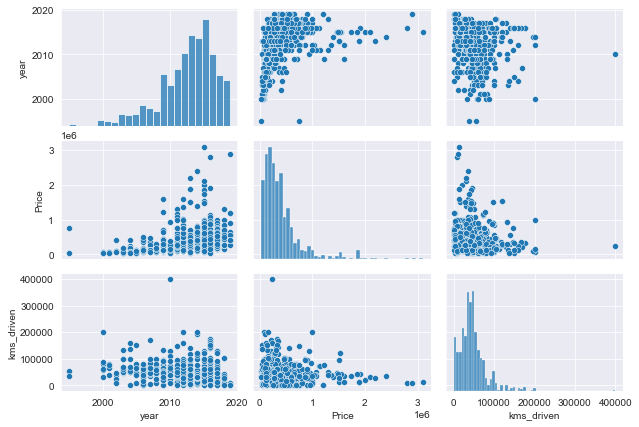

In [91]:
sns.pairplot(data, size = 2, aspect = 1.5)

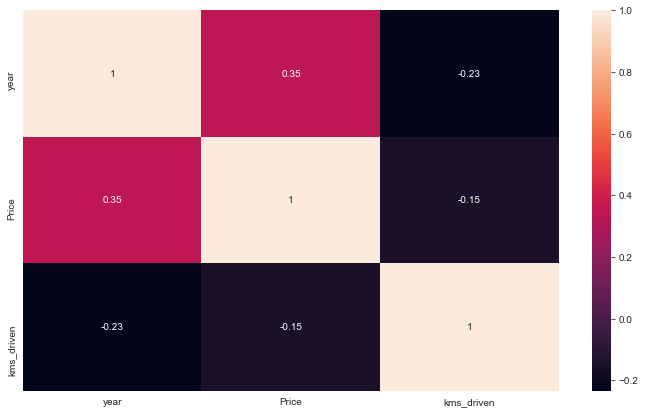

In [92]:
sns.heatmap(data.corr(), annot=True);

---
<a name = Section8></a>
# **8. Linear Regression Model**
---


<a id = Section801></a>
### 8.1 Preparing X and y using pandas

In [36]:
X = data.drop(columns='Price')
y = data.Price

In [37]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [38]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

<a id=Section802></a>
### 8.2 Splitting X and y into training and test datasets.

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [101]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [102]:
colmn_trans = make_column_transformer( (OneHotEncoder(categories=ohe.categories_), 
                                        ['name', 'company', 'fuel_type']), remainder = 'passthrough')

In [103]:
lr = LinearRegression()

In [104]:
pipe = make_pipeline(colmn_trans, lr)

In [105]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [106]:
y_pred = pipe.predict(X_test)

In [116]:
y_pred_train = pipe.predict(X_train)

In [107]:
r2_score(y_test, y_pred)

0.7851438430969959

In [ ]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(colmn_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [108]:
np.argmax(scores)

661

In [109]:
r2_score_test = scores[np.argmax(scores)] # To find max r2_score
r2_score_test

0.8897680821375169

In [110]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(colmn_trans, lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
scores.append(r2_score(y_test, y_pred))

In [111]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (652, 5)
y_train shape:  (652,)

Test cases as below
X_test shape:  (163, 5)
y_test shape:  (163,)


In [114]:
r2_score_test = r2_score(y_test, y_pred)
r2_score_test

0.8897680821375169

In [120]:
yhat = pipe.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
adjusted_r_squared = 1 - (1-r2_score_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# print(r2_score_test, adjusted_r_squared)
print('r2 Score for test set is {}'.format(r2_score_test))
print('Adj r2 Score for test set is {}'.format(adjusted_r_squared))

r2 Score for test set is 0.8897680821375169
Adj r2 Score for test set is 0.8862575115049538


In [118]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_train

0.9435307877309999

In [121]:
yhat_train = pipe.predict(X_train)
SS_Residual = sum((y_train-yhat_train)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
adjusted_r_squared_train = 1 - (1-r2_score_train)*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1)
# print(r2_score_train, adjusted_r_squared)
print('r2 Score for train set is {}'.format(r2_score_train))
print('Adj r2 Score for train set is {}'.format(adjusted_r_squared_train))

r2 Score for train set is 0.9435307877309999
Adj r2 Score for train set is 0.9430937195245834


In [136]:
error_test = y_pred - y_test
error_train = y_pred_train - y_train

test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 127242.82010168581
RMSE for train data is 90498.95061604808


Text(0.5, 0, 'Index')

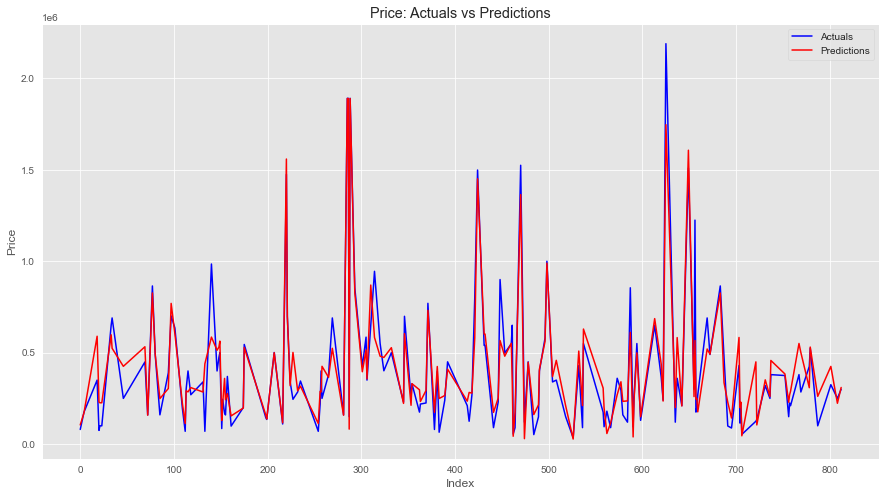

In [145]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,8))
sns.lineplot(x= y_test.index,y =y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x= y_test.index,y =y_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

### Model 2: Creating a model with test size as 0.25

In [124]:
 X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.25, random_state = np.argmax(scores))
lr2 = LinearRegression()
pipe2 = make_pipeline(colmn_trans, lr2)
pipe2.fit(X2_train, y2_train)
y2_pred = pipe2.predict(X2_test)


In [125]:
print('Train cases as below')
print('X2_train shape: ',X2_train.shape)
print('y2_train shape: ',y2_train.shape)
print('\nTest cases as below')
print('X2_test shape: ',X2_test.shape)
print('y2_test shape: ',y2_test.shape)

Train cases as below
X2_train shape:  (611, 5)
y2_train shape:  (611,)

Test cases as below
X2_test shape:  (204, 5)
y2_test shape:  (204,)


In [139]:
y2_pred_train = pipe2.predict(X2_train)

In [126]:
r2_score_test_2 = r2_score(y2_test, y2_pred)
r2_score_test_2

0.894353431912939

In [127]:
yhat_2 = pipe2.predict(X2_test)
SS_Residual = sum((y2_test-yhat_2)**2)
SS_Total = sum((y2_test-np.mean(y2_test))**2)
adjusted_r_squared_2 = 1 - (1-r2_score_test_2)*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)
# print(r2_score_test, adjusted_r_squared)
print('r2 Score for test set is {}'.format(r2_score_test_2))
print('Adj r2 Score for test set is {}'.format(adjusted_r_squared_2))

r2 Score for test set is 0.894353431912939
Adj r2 Score for test set is 0.8916855892844779


In [140]:
error_test_2 = y2_pred - y2_test
error_train_2 = y2_pred_train - y2_train

test_RMSE_2 =(((error_test_2**2).mean())**0.5)
train_RMSE_2 =(((error_train_2**2).mean())**0.5)

print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE_2))
print("RMSE for train data is {}".format(train_RMSE_2))

----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 124530.04324925906
RMSE for train data is 92017.34011962687


Text(0.5, 0, 'Index')

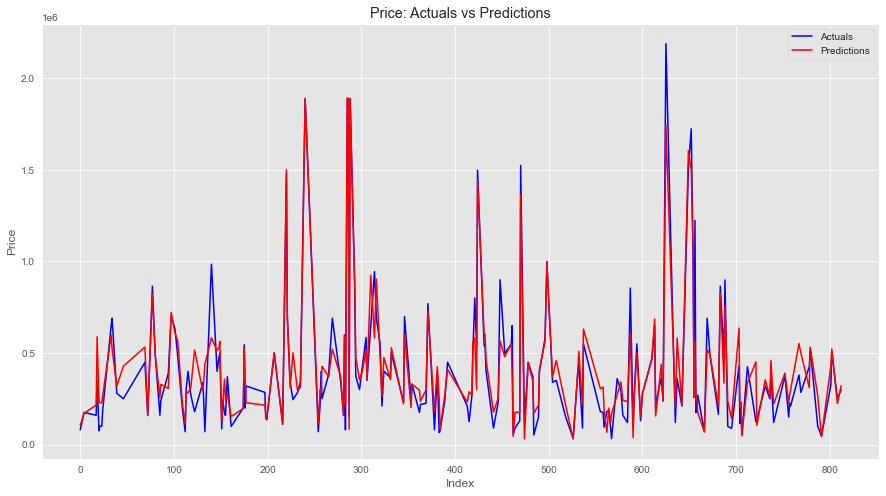

In [149]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,8))
sns.lineplot(x= y2_test.index,y =y2_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x= y2_test.index,y =y2_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

### Model 3: Creating a model with test size as 0.3

In [132]:
 X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.3, random_state = np.argmax(scores))
lr3 = LinearRegression()
pipe3 = make_pipeline(colmn_trans, lr3)
pipe3.fit(X3_train, y3_train)
y3_pred = pipe3.predict(X3_test)

In [133]:
print('Train cases as below')
print('X3_train shape: ',X3_train.shape)
print('y3_train shape: ',y3_train.shape)
print('\nTest cases as below')
print('X3_test shape: ',X3_test.shape)
print('y3_test shape: ',y3_test.shape)

Train cases as below
X3_train shape:  (570, 5)
y3_train shape:  (570,)

Test cases as below
X3_test shape:  (245, 5)
y3_test shape:  (245,)


In [134]:
r2_score_test_3 = r2_score(y3_test, y3_pred)
r2_score_test_3

0.7922808869851461

In [135]:
yhat_3 = pipe3.predict(X3_test)
SS_Residual = sum((y3_test-yhat_3)**2)
SS_Total = sum((y3_test-np.mean(y3_test))**2)
adjusted_r_squared_3 = 1 - (1-r2_score_test_3)*(len(y3_test)-1)/(len(y3_test)-X3_test.shape[1]-1)
# print(r2_score_test, adjusted_r_squared)
print('r2 Score for test set is {}'.format(r2_score_test_3))
print('Adj r2 Score for test set is {}'.format(adjusted_r_squared_3))

r2 Score for test set is 0.7922808869851461
Adj r2 Score for test set is 0.7879352988467601


Text(0.5, 0, 'Index')

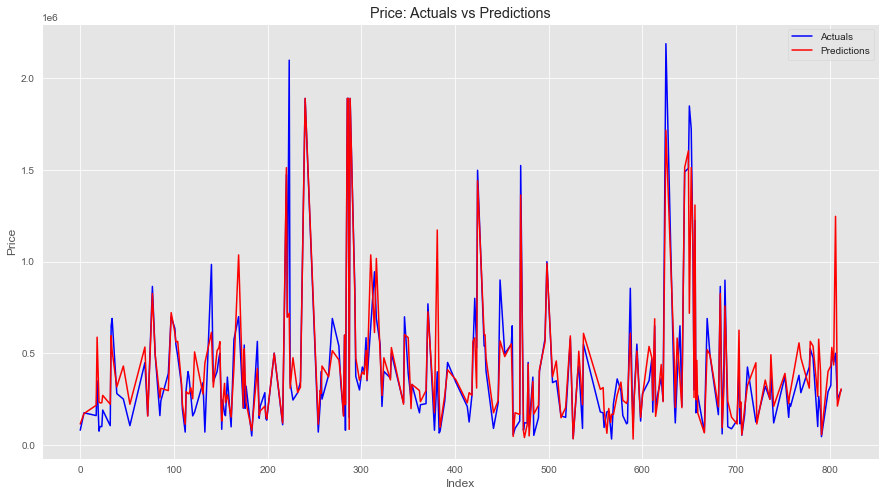

In [150]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,8))
sns.lineplot(x= y3_test.index,y =y3_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x= y3_test.index,y =y3_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

<a id = Section803></a>
### 8.3 Model Evaluation

|Model|r2 Score|Adj R2 score|
|:--|:--|:--|
|Model 1| 0.88976             |  0.88625 |
|**Model 2**| **0.89435**             |  **0.891685**|
|Model 3| 0.79228             |  0.787935 |